In [346]:
!pip3 install matplotlib
!pip3 install numpy
!pip3 install scipy
!pip3 install scikit-learn


In [347]:
# basic imports

import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
from sklearn.linear_model import LinearRegression
import random

In [348]:
# extract data

def extract_data() :
    X = []
    Y = []
    
    data_file = open("housing.csv")
    data_reader = csv.reader(data_file)
    
    row_count = 0
    for row in data_reader :
        row_count += 1
        if(row_count != 1) :
            Y.append(float(row[1])) # price
            data_row = [float(1)]
            for i in range(2, len(row)) :
                if(row[i] == "yes" or row[i] == "no") :
                    if(row[i] == "yes") :
                        data_row.append(float(1))
                    else :
                        data_row.append(float(0))
                else :
                    data_row.append(float(row[i]))
            X.append(data_row)
    
    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y

In [349]:
# linear regression functions

# cost function linear regression normal
def cost_function_LR(X, Y, theta) :
    sample_count = float(X.shape[0])
    return (float(1) / (float(2) * sample_count)) * float(np.dot(np.transpose(np.dot(X, theta) - Y) , np.dot(X, theta) - Y))

# gradient descent linear regression normal
def gradient_descent_LR(X, Y, theta, alpha, threshold) :
    costs = [cost_function_LR(X, Y, theta)]
    iterations = [1]
    sample_count = float(X.shape[0])
    iteration_count = 2
    
    while(True):
        theta = theta - (alpha / sample_count) * np.dot(np.transpose(X), np.dot(X, theta) - Y)
        
        current_cost = cost_function_LR(X, Y, theta)
#         if(iteration_count % 5000 == 0) :
#             print(iteration_count, " => ", current_cost, " prev cost : ", costs[iteration_count - 2], " error diff :" , costs[iteration_count - 2] - current_cost)
        prev_cost = costs[iteration_count - 2]
        costs.append(current_cost)
        iterations.append(iteration_count)
        
        if(prev_cost - current_cost <= threshold) :
            break
            
        iteration_count = iteration_count + 1
    
    print("Total iterations: ", iteration_count)
    display_graph(costs, iterations)    # display graph 
    return theta

# initialize theta
def init_theta_LR(X) :
    return np.zeros(X.shape[1])

# display cost function v/s iterations
def display_graph(costs, iterations) :
#     print("Number of iterations: ", iterations[len(iterations) - 1])
#     print("Final cost : ", costs[len(costs) - 1])
    plt.plot(iterations, costs)
    
# normal equation 
def normal_equation(X, Y) :
    return np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.dot(np.transpose(X), Y))

In [350]:
# initialize global variables

X, Y = extract_data()

alpha = 0.001
threshold = 0.001
theta = init_theta_LR(X)

In [351]:
# apply standardization
std_vals = np.std(X, axis=0)
mean_vals = np.mean(X, axis=0)

for i in range(X.shape[0]) :
    for j in range(X.shape[1]) :
        if(std_vals[j] != 0) :
            X[i][j] = X[i][j] - mean_vals[j]
            X[i][j] = X[i][j] / std_vals[j]

Total iterations:  17096
Final theta LR :  [68121.59452683  7681.24918067  1350.69260459  7192.34987633
  5686.05621156  2328.16523976  1724.83428173  2599.2129545
  2682.1725849   5877.93872438  3652.65700039  3969.57738897]
Final cost LR :  116323326.88580276


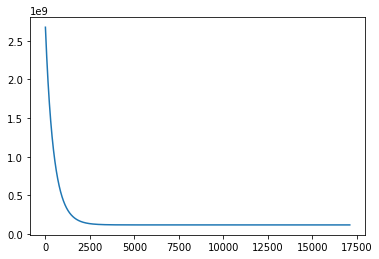

In [352]:
# get params for LR

LR_theta = gradient_descent_LR(X, Y, theta, alpha, threshold)
print("Final theta LR : ", LR_theta)
print("Final cost LR : ", cost_function_LR(X, Y, LR_theta))

In [353]:
# for normal equation LR
normal_equation_LR_theta = normal_equation(X, Y)
print("Final cost normal : ", cost_function_LR(X, Y, normal_equation_LR_theta))
print("Final theta values normal : ", normal_equation_LR_theta)

Final cost normal :  116323325.68174724
Final theta values normal :  [68121.5970696   7681.90333904  1349.65960237  7192.11811316
  5687.54112736  2327.66806048  1724.3147626   2600.30789607
  2682.07228891  5877.43118895  3652.74942358  3969.33279353]


In [354]:
# using scikit learn library to verify answer
lr = LinearRegression()
lr.fit(X, Y)
# print(lr.score(X, Y))
print("Final coefficients LR: " , lr.coef_)
print("Final intercept LR: " , lr.intercept_)

Final coefficients LR:  [   0.         7681.90333904 1349.65960237 7192.11811316 5687.54112736
 2327.66806048 1724.3147626  2600.30789607 2682.07228891 5877.43118895
 3652.74942358 3969.33279353]
Final intercept LR:  68121.59706959708


In [355]:
# apply regularization , init global variables 
reg_lambda = 0.1

In [356]:
# linear regression regularized functions

# cost function linear regression regularized
def cost_function_LR_reg(X, Y, theta, reg_lambda) :
    sample_count = float(X.shape[0])
    reg_sum = (reg_lambda / (float(2) * sample_count)) * np.sum(np.square(theta[1:]))
    return (float(1) / (float(2) * sample_count)) * float(np.dot(np.transpose(np.dot(X, theta) - Y) , np.dot(X, theta) - Y)) + reg_sum

# gradient descent linear regression regularized
def gradient_descent_LR_reg(X, Y, theta, alpha, threshold, reg_lambda) :
    costs = [cost_function_LR_reg(X, Y, theta, reg_lambda)]
    iterations = [1]
    sample_count = float(X.shape[0])
    iteration_count = 2
    
    while(True):
        reg_term = (reg_lambda) * theta
        reg_term[0] = 0
        theta = theta - (alpha / sample_count) * (np.dot(np.transpose(X), np.dot(X, theta) - Y) + reg_term)
        
        current_cost = cost_function_LR_reg(X, Y, theta, reg_lambda)
        prev_cost = costs[iteration_count - 2]
        costs.append(current_cost)
        iterations.append(iteration_count)
        
        if(prev_cost - current_cost <= threshold) :
            break
            
        iteration_count = iteration_count + 1
    
    print("Total iterations: ", iteration_count)
    display_graph(costs, iterations)    # display graph 
    return theta

# initialize theta
def init_theta_LR_reg(X) :
    return np.zeros(X.shape[1])
    
# normal equation 
def normal_equation_reg(X, Y, reg_lambda) :
    reg_term = np.zeros((X.shape[1], X.shape[1]))
    for i in range(1, X.shape[1]) :
        reg_term[i][i] = reg_lambda
    
    return np.dot(np.linalg.inv(np.dot(np.transpose(X), X) + reg_term), np.dot(np.transpose(X), Y))

Total iterations:  17089
Final cost LR reg :  116344468.8618906
Final theta values LR reg :  [68121.59450896  7680.12586032  1351.52327014  7191.42938284
  5685.13213484  2328.35786138  1725.0860881   2598.6506428
  2681.62765466  5877.36829972  3652.61184557  3969.23458743]


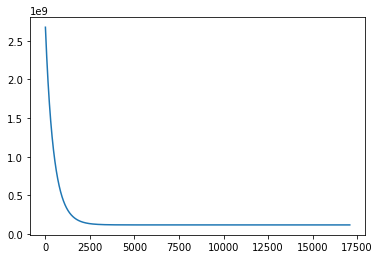

In [357]:
# Regularized linear regression using gradient descent

theta = init_theta_LR_reg(X)
theta_LR_reg = gradient_descent_LR_reg(X, Y, theta, alpha, threshold, reg_lambda)

print("Final cost LR reg : ", cost_function_LR_reg(X, Y, theta_LR_reg, reg_lambda))
print("Final theta values LR reg : ", theta_LR_reg)

In [358]:
# regularized normal equation
theta = init_theta_LR_reg(X)
normal_equation_LR_reg_theta = normal_equation_reg(X, Y, reg_lambda)

print("Final cost LR reg : ", cost_function_LR_reg(X, Y, normal_equation_LR_reg_theta, reg_lambda))
print("Final theta values LR reg : ", normal_equation_LR_reg_theta)

Final cost LR reg :  116344467.65890989
Final theta values LR reg :  [68121.5970696   7680.77961523  1350.49089731  7191.19786875
  5686.61602204  2327.86101151  1724.56688369  2599.7448518
  2681.52744473  5876.86113663  3652.7041446   3968.9901632 ]


In [359]:
# split into train and test

train_size = int((X.shape[0] * 7) / 10)
X_train_indices = random.sample(range(0, X.shape[0]), train_size)

X_train = []
X_test = []
Y_train = []
Y_test = []

for i in range(X.shape[0]) :
    if i in X_train_indices :
        X_train.append(X[i])
        Y_train.append(Y[i])
    else :
        X_test.append(X[i])
        Y_test.append(Y[i])

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Total iterations:  16259
Final train cost LR reg :  128838076.08846697
Final train theta values LR reg :  [67887.74819169  8749.02470464  1402.86037433  7414.08847368
  5688.11357881  2007.60580541  2160.30541606  2212.38046431
  1976.3623115   5587.72008534  3382.06779906  3904.94108006]


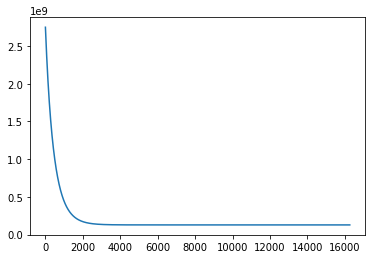

In [360]:
# Regularized linear regression using gradient descent

theta = init_theta_LR_reg(X_train)
theta_LR_reg = gradient_descent_LR_reg(X_train, Y_train, theta, alpha, threshold, reg_lambda)

print("Final train cost LR reg : ", cost_function_LR_reg(X_train, Y_train, theta_LR_reg, reg_lambda))
print("Final train theta values LR reg : ", theta_LR_reg)

In [361]:
# regularized normal equation
theta = init_theta_LR_reg(X_train)
normal_equation_LR_reg_theta = normal_equation_reg(X_train, Y_train, reg_lambda)

print("Final train cost LR reg : ", cost_function_LR_reg(X_train, Y_train, normal_equation_LR_reg_theta, reg_lambda))
print("Final train theta values LR reg : ", normal_equation_LR_reg_theta)

Final train cost LR reg :  128838074.90943304
Final train theta values LR reg :  [67887.751878    8749.6842668   1401.92686687  7413.704708
  5689.54574534  2007.03755567  2159.88346937  2213.48524141
  1976.26849608  5587.27934957  3382.23874065  3904.59981973]


In [362]:
# finding error for test data
print("Error obtained for test data : ", cost_function_LR_reg(X_test, Y_test, normal_equation_LR_reg_theta, reg_lambda))

Error obtained for test data :  90359909.995826
